# Problem statement

This dataset contains information about used cars listed on www.cardekho.com This data can be used for a lot of purposes such as price prediction to exemplify the use of regression techniques in Machine Learning.

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [240]:
dataset = pd.read_csv('car_details.csv')
dataset.head(5)

,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5.0


In [241]:
dataset.shape

(8128, 11)

In [242]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       8128 non-null   object 
 1   Year           8128 non-null   int64  
 2   Selling_Price  8128 non-null   int64  
 3   Km_Driven      8128 non-null   int64  
 4   Fuel           8128 non-null   object 
 5   Seller_Type    8128 non-null   object 
 6   Transmission   8128 non-null   object 
 7   Owner          8128 non-null   object 
 8   Mileage        7907 non-null   float64
 9   Engine         7907 non-null   float64
 10  Seats          7907 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 698.6+ KB


In [243]:
########################## Checking null values in each feature #################################
dataset.isnull().sum()

Car_Name           0
Year               0
Selling_Price      0
Km_Driven          0
Fuel               0
Seller_Type        0
Transmission       0
Owner              0
Mileage          221
Engine           221
Seats            221
dtype: int64

In [244]:
########## Since the null values in Mileage, Engine and Seats are greater than 2% (2.7%) . So we have to impute. Replacing null values in categorical column by mode and numerical column by median

dataset['Seats'].fillna(dataset['Seats'].mode()[0], inplace = True)
dataset['Engine'].fillna(dataset['Engine'].median(), inplace = True)
dataset['Mileage'].fillna(dataset['Mileage'].median(), inplace = True)

In [245]:
dataset.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Km_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
Mileage          0
Engine           0
Seats            0
dtype: int64

# Explanatory Data Analysis

1. Which vehicle got highest price ?

In [246]:
dataset[dataset.Present_Price == dataset.Present_Price.max()][['Car_Name','Present_Price']]

AttributeError: 'DataFrame' object has no attribute 'Present_Price'

2. which top 10 vehicle company is in more for sale ?

In [126]:
import plotly.express as px

px.pie(data_frame = dataset ,names = dataset.Car_Name.value_counts().head(10).index, values = dataset.Car_Name.value_counts().values[0:10],
      title = "Top 10 vehicle company is more for sale",hole = 0.7
      )

3 . which year more number of vehicle are being availabel for second's ?

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, "year v/s vehicle's availabel for second's ")

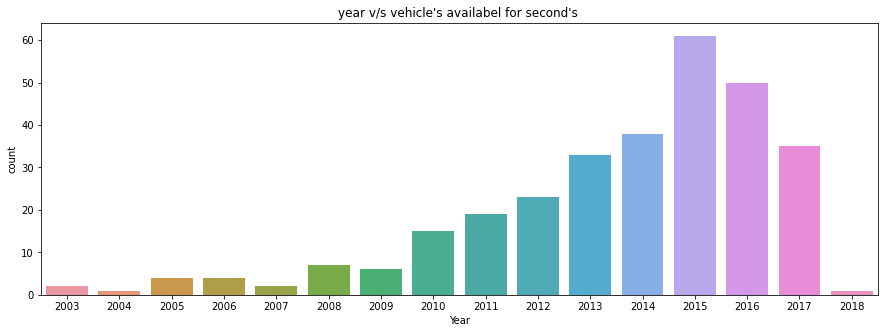

In [127]:
plt.figure(figsize = (15,5))
sns.countplot(dataset['Year'])
plt.title("year v/s vehicle's availabel for second's ")

4 . selling_price v/s present_price ?

Text(0, 0.5, 'Price')

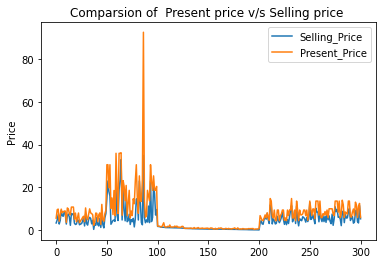

In [128]:
dataset[["Selling_Price","Present_Price"]].plot(kind = 'line')
plt.title("Comparsion of  Present price v/s Selling price ")
plt.ylabel("Price")

selling price of vehicle is lesser than it's present price ,it might be due to less demand or more usage of that particular vehicle 

5. which type of fuel used by most of the vehicle ?

In [129]:
px.pie(data_frame = dataset ,names = dataset.Fuel_Type.value_counts().index,values = dataset.Fuel_Type.value_counts().values,
      title = "vehicle fuel type " ,hole = 0.7
      )

5. which type of transmission used by most of the vehicle ?

In [130]:
px.pie(data_frame = dataset ,names = dataset.Transmission.value_counts().index,values = dataset.Transmission.value_counts().values,
      title = "vehicle fuel type " ,hole = 0.7
      )

6. seller type

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

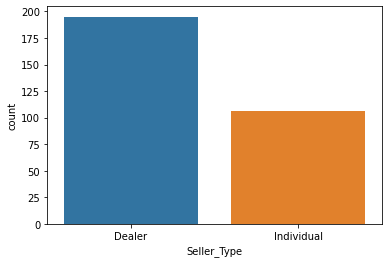

In [131]:
sns.countplot(dataset['Seller_Type'])

 Most of the vehicle owner are trying to sell their vehicle with the help of  dealer 

In [132]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [133]:
dataset.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


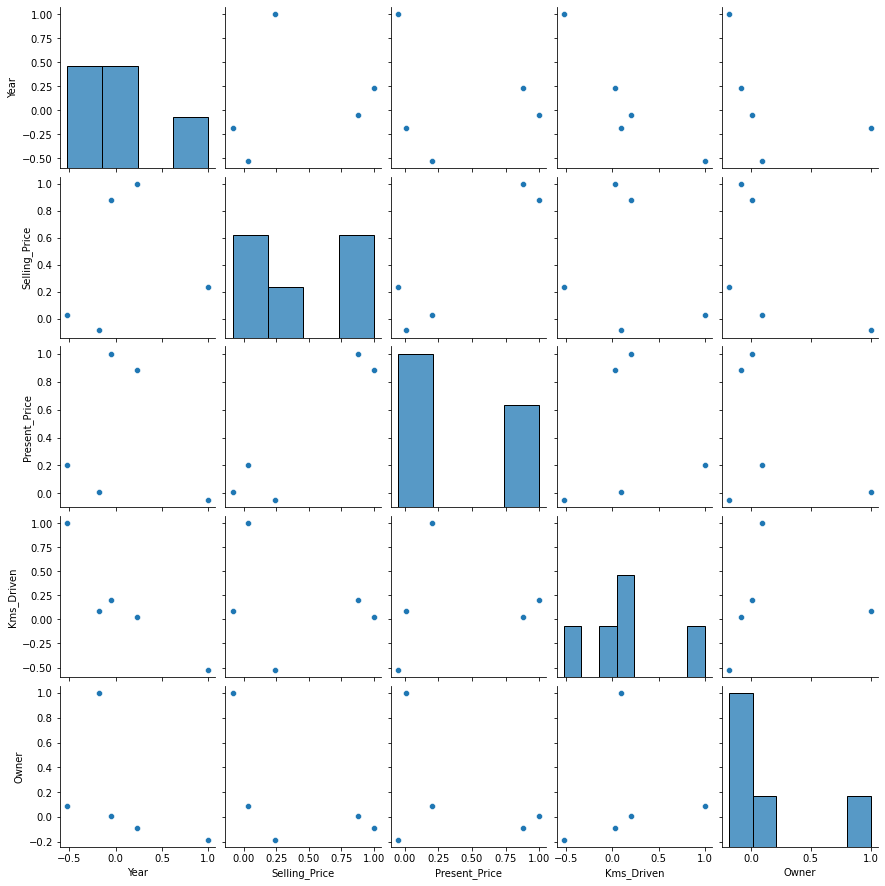

In [134]:
################### Visualizing correlation between features using pairplot ###########################

sns.pairplot(dataset.corr())

<AxesSubplot:>

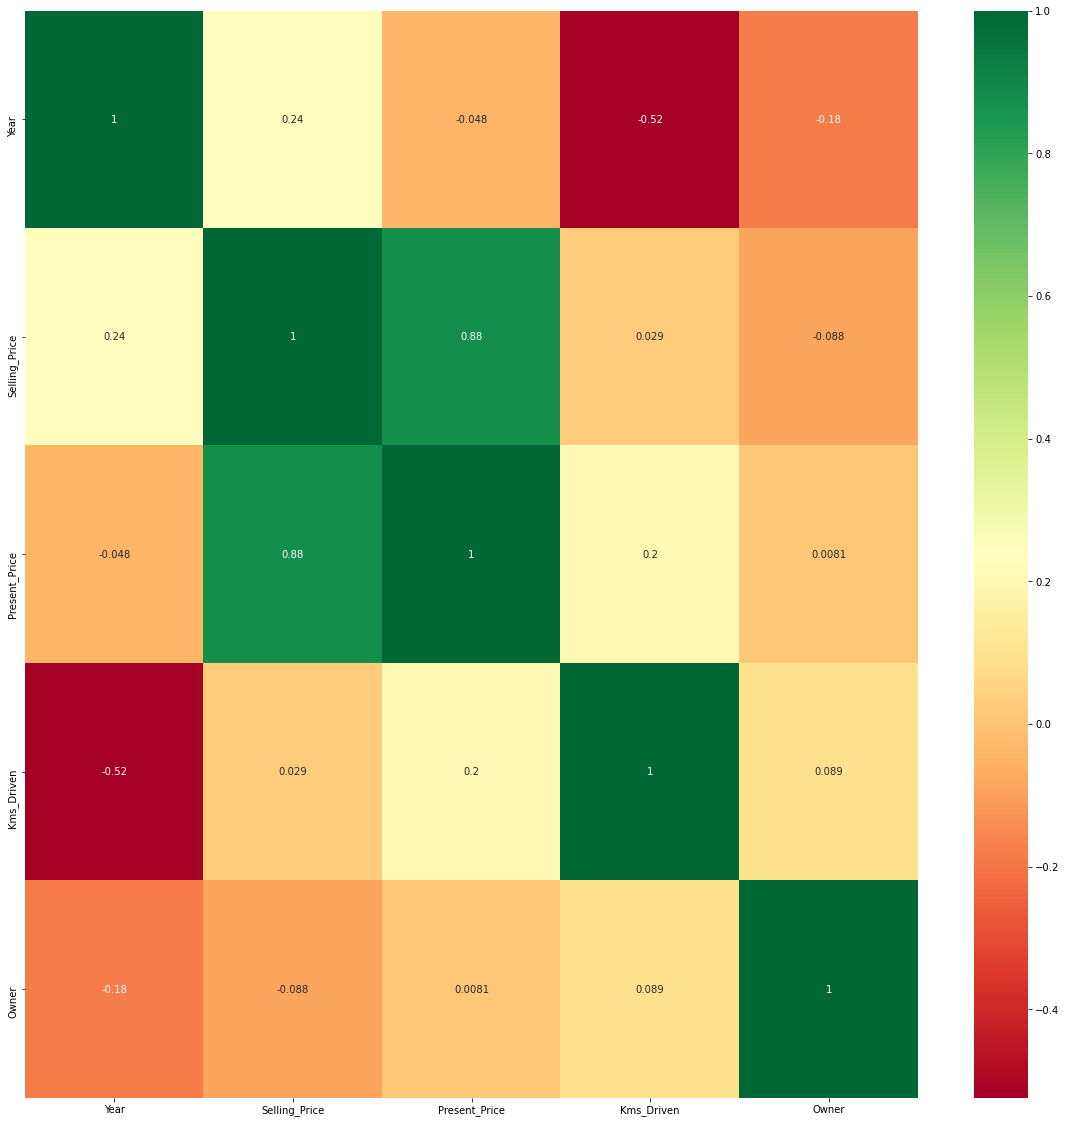

In [135]:
################### Visualizing correlation between features using heatmap ###########################

%matplotlib inline
plt.figure(figsize = (20,20))
sns.heatmap(dataset.corr(), cmap = 'RdYlGn', annot = True)

# Data Exploration

In [136]:
########################## Checking null values in each feature #################################

dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [222]:
######## Checking unique values in the categorical columns of Fuel_Type, Seller_Type,Transmission and Owner ##############

print(dataset['Fuel'].unique())
print(dataset['Seller_Type'].unique())
print(dataset['Transmission'].unique())
print(dataset['Owner'].unique())

KeyError: 'Fuel_Type'

In [138]:
################ Creating a new feature of number of years from Year feature for checking how old the car is ###################

dataset['no_year'] = 2022 - dataset['Year']
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [139]:
########## Dropping Car_Name and Year column from dataset #########################

dataset = dataset[['Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission', 'Owner','no_year']]
dataset.head(5)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [140]:
############# Converting categorical features into dummy variables #########################
final_dataset = pd.get_dummies(dataset , drop_first = True )
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [141]:
################## Separating dependent and independent variables from final dataset ######################
x = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0:1]

In [142]:
x.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [143]:
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [144]:
############ Checking important features ###################

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

<ipython-input-144-ccc20bee3bd8>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



ExtraTreesRegressor()

In [145]:
print(model.feature_importances_)

[0.39632305 0.04614287 0.00086911 0.07539525 0.20359315 0.01557823
 0.13660264 0.12549571]


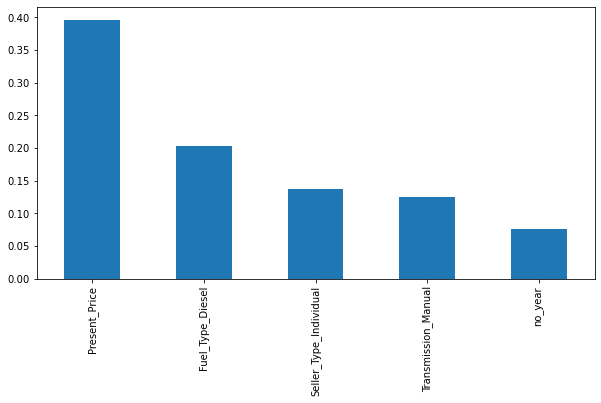

In [146]:
#################### Visualizing top 5 features ##############################

features = pd.Series(model.feature_importances_, index = x.columns)
features = features.nlargest(5)
plt.figure(figsize = (10,5))
features.plot(kind = 'bar')
plt.show()

# Data splitting and model fitting 

In [147]:
######################### Creating train-test split from x and y ##########################

from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [148]:
x_train

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
222,7.60,77632,0,8,1,0,0,1
283,11.80,9010,0,6,0,1,0,1
44,2.69,50000,0,10,0,1,0,1
245,9.40,71000,0,10,1,0,0,1
191,0.57,25000,1,10,0,1,1,1
...,...,...,...,...,...,...,...,...
251,9.90,56701,0,9,0,1,0,1
192,0.75,49000,1,15,0,1,1,1
117,1.90,14000,0,7,0,1,1,1
47,4.15,65000,0,16,0,1,0,1


In [149]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [150]:
############################################ Hyperparameters ###############################################################

##################### number of trees in random forest ##############################################
n_estimators = [int(x) for x in np.linspace(100 , 1200 , num= 10)]

##################### maximum features from data to train the model ##################################
max_features = ['sqrt','auto']

##################### minimum number of samples for splitting the data ################################
min_samples_split = [2,5,10,15,100]

##################### minimum number of sample required for spplitting data at leaf node ###############
min_samples_leaf = [1,2,5,10]

##################### max depth ########################################################################
max_depth =  [int(x) for x in np.linspace(5,30, num = 6)]

In [151]:
############ creating a random grid for hyperparameter tuning ###############
random_grid = {'n_estimators' : n_estimators,
               'max_features':max_features , 
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'max_depth' : max_depth}
random_grid

{'n_estimators': [100, 222, 344, 466, 588, 711, 833, 955, 1077, 1200],
 'max_features': ['sqrt', 'auto'],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_depth': [5, 10, 15, 20, 25, 30]}

In [152]:
############### Hyperparameter tuning ####################
from sklearn.model_selection import RandomizedSearchCV
regressor_tune = RandomizedSearchCV(estimator = regressor, 
                                    param_distributions = random_grid, 
                                    cv = 5, 
                                    scoring = 'neg_mean_squared_error',
                                    verbose = 2, 
                                    n_jobs = -1,
                                    random_state = 0 )
regressor_tune.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 222, 344, 466,
                                                         588, 711, 833, 955,
                                                         1077, 1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [153]:
regressor_tune.best_params_

{'n_estimators': 1077,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [154]:
regressor_tune.best_score_

-4.158049861245865

In [155]:
y_pred = regressor_tune.predict(x_test)
y_pred = y_pred.round(decimals = 2)

# Evaluating the performance of model

In [156]:
y_test_v1 = y_test.values

In [157]:
check = np.concatenate((y_test_v1.reshape(len(y_test_v1),1), y_pred.reshape(len(y_pred),1)),1)
check

array([[ 8.25,  6.99],
       [ 0.5 ,  0.53],
       [ 5.25,  4.96],
       [ 9.5 ,  8.84],
       [18.  , 12.46],
       [ 5.5 ,  5.12],
       [ 3.75,  3.28],
       [ 0.45,  0.42],
       [ 4.5 ,  3.94],
       [ 4.5 ,  4.78],
       [ 2.7 ,  3.01],
       [ 0.72,  0.7 ],
       [ 5.25,  5.04],
       [ 7.5 ,  7.21],
       [ 7.75,  7.52],
       [19.75, 12.23],
       [ 7.4 ,  6.89],
       [ 4.75,  4.1 ],
       [ 0.35,  0.48],
       [ 1.7 ,  1.55],
       [ 4.4 ,  3.37],
       [ 5.25,  5.08],
       [ 5.11,  5.1 ],
       [11.25, 10.02],
       [ 0.2 ,  0.19],
       [ 0.78,  0.73],
       [ 0.38,  0.31],
       [ 0.65,  0.71],
       [ 0.5 ,  0.49],
       [ 3.6 ,  5.09],
       [ 3.25,  2.84],
       [ 7.2 ,  5.95],
       [ 0.6 ,  0.49],
       [ 8.75,  7.22],
       [ 3.  ,  3.51],
       [ 1.15,  1.14],
       [ 6.6 ,  5.71],
       [ 4.75,  5.39],
       [ 0.25,  0.21],
       [ 8.25,  8.9 ],
       [ 9.25,  7.94],
       [19.99, 20.82],
       [ 5.5 ,  5.02],
       [ 4.

In [158]:
################ Checking the accuracy of model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8852190314708618

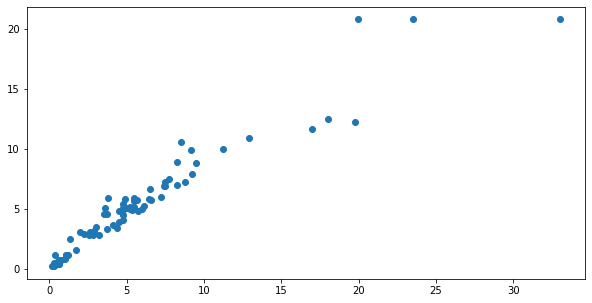

In [159]:
plt.figure(figsize = (10,5))
plt.scatter(y_test, y_pred)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

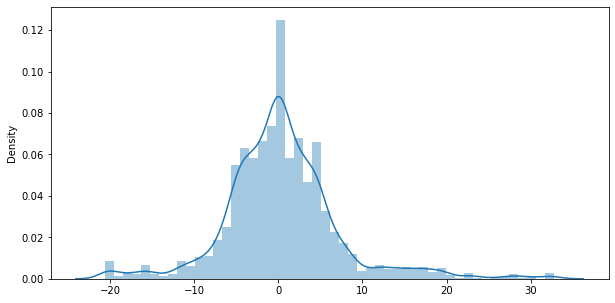

In [160]:
plt.figure(figsize = (10,5))
sns.distplot(y_test_v1 - y_pred)